In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Fuel.csv")
print(data.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

array([[<Axes: title={'center': 'MODELYEAR'}>,
        <Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_CITY'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_HWY'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB_MPG'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>, <Axes: >]], dtype=object)

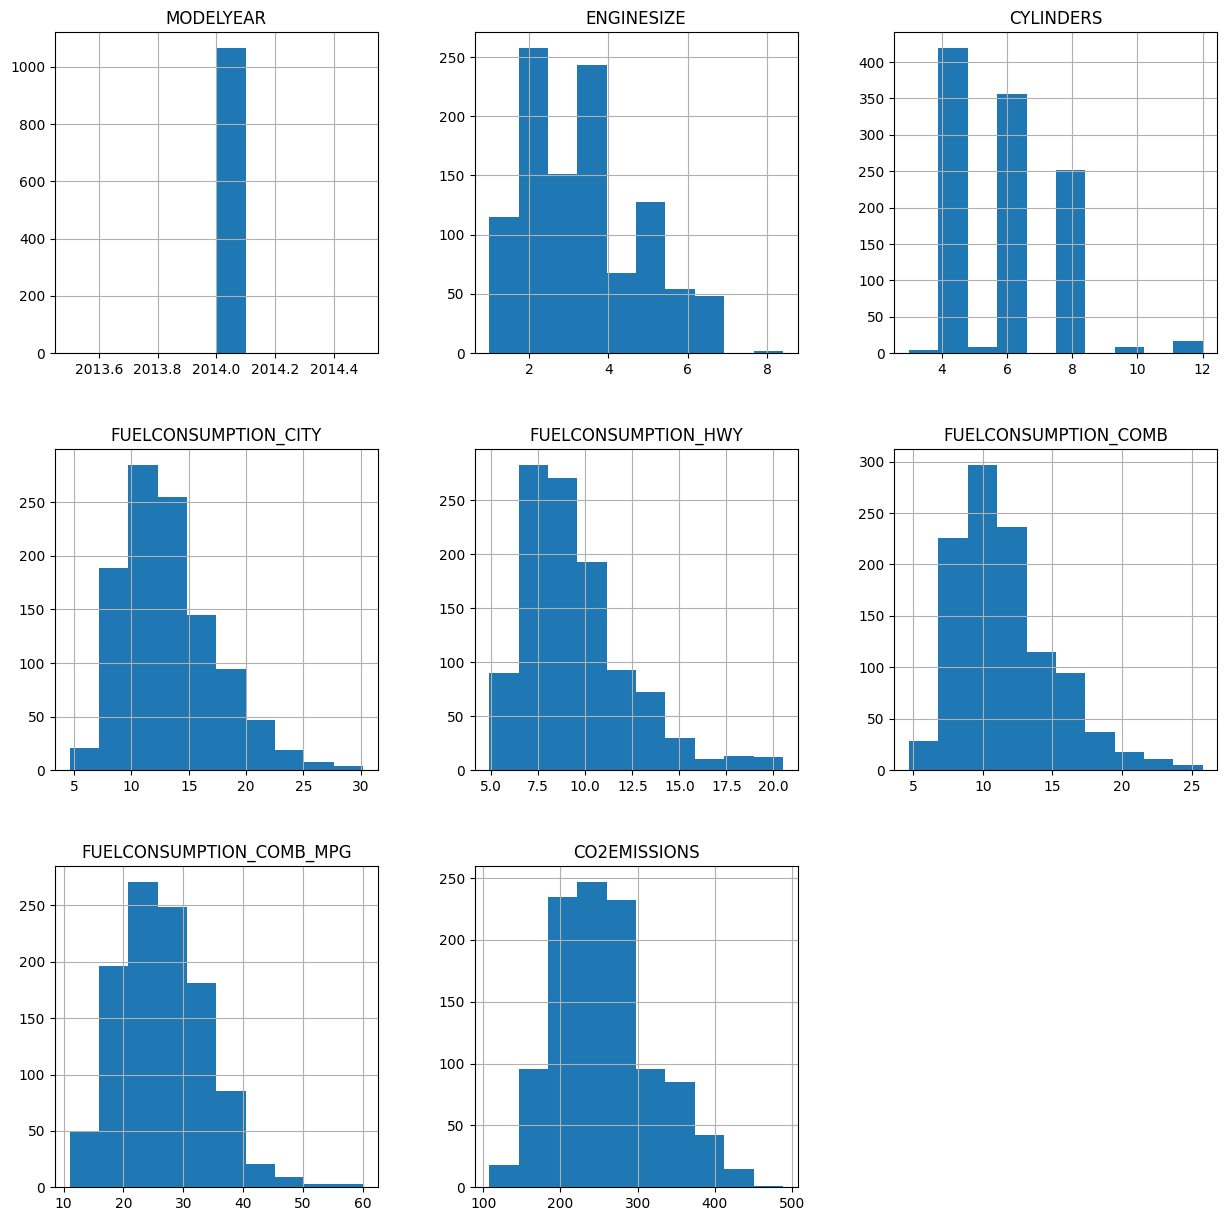

In [5]:
data.hist(figsize=(15,15))

<Axes: ylabel='Count'>

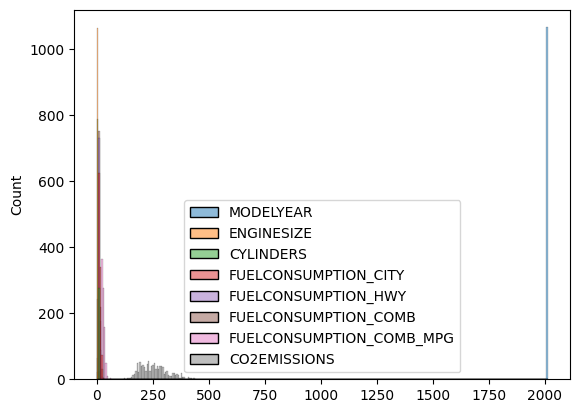

In [8]:
sns.histplot(data=data)

In [19]:
# sns.heatmap(data.corr(),annot=True)

<Axes: >

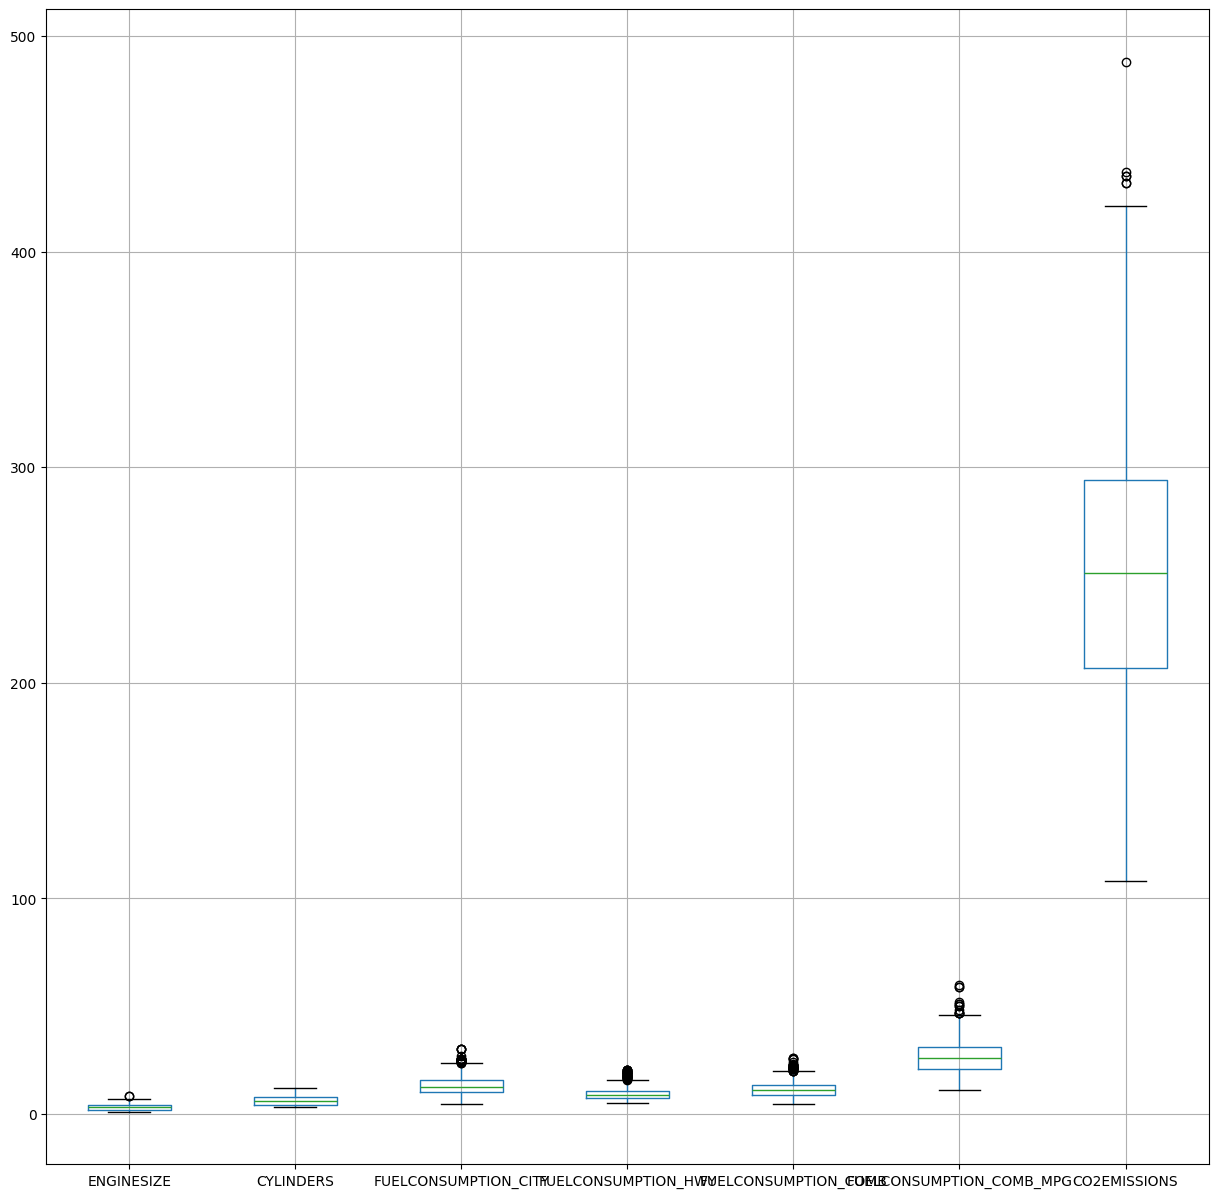

In [10]:
data.iloc[:,1:].boxplot(figsize=(15,15))

In [11]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [13]:
feature=['ENGINESIZE','FUELCONSUMPTION_COMB']
X=data[feature].values
Y=data['CO2EMISSIONS'].values

In [15]:
# normalisation
from sklearn.preprocessing import MinMaxScaler,StandardScaler
print("mean and std before ",X.mean(),X.std())
sc=StandardScaler()
Xscaled=sc.fit_transform(X)
print(Xscaled)
print("mean and std after ",Xscaled.mean(),Xscaled.std())

mean and std before  7.463589503280225 4.901277538659447
[[-0.9512918  -0.88430407]
 [-0.66865251 -0.5685715 ]
 [-1.30459092 -1.63058106]
 ...
 [-0.24469358  0.06289365]
 [-0.10337393 -0.08062116]
 [-0.10337393  0.34992326]]
mean and std after  4.661479990928492e-17 1.0


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xscaled,Y,random_state=51,test_size=0.2)
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(853, 2) (214, 2)
(853,) (214,)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lmodel=LinearRegression()
l=lmodel.fit(xtrain,ytrain)
ypred=lmodel.predict(xtest)
# print(ypred)
w1,w2=lmodel.coef_
print(w1,w2)
b=lmodel.intercept_
print(b)

27.550080017870176 33.08842818511106
255.76664235440728


In [33]:
# error
print("mse",metrics.mean_squared_error(ytest,ypred))
print("mae",metrics.mean_absolute_error(ytest,ypred))
print("rmse",np.sqrt(metrics.mean_squared_error(ytest,ypred)))

mse 526.2935168501341
mae 16.881532736318082
rmse 22.94108796134425


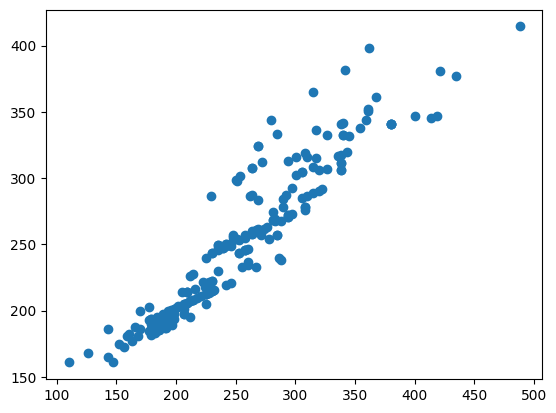

In [34]:
plt.scatter(ytest,ypred)

In [51]:
# using least square estimation method
X1=xtrain[:,0]
Y1=ytrain
wm=(np.mean(X1*Y1)-(np.mean(X1)*np.mean(Y1)))/(np.mean(X1*X1)-(np.mean(X1)*np.mean(X1)))
print(wm)
b1=Y1.mean()-(wm*X1.mean())
print(b1)

54.82189158298207
255.93085789568457


In [116]:
X1=xtrain[:,0]
Y1=ytrain
def grade(X1,Y1,learn,numm):
    w=0
    b=0
    n=len(X1)
    errorlist=[]
    for i in range(numm):
        Ypredd=w*X1+b
        wd=(2/n)*sum((Ypredd-Y1)*X1)
        bd=(2/n)*sum(Ypredd-Y1)
        J=(1/n)*sum([val**2 for val in (Ypredd-Y1)])
        w=w-(learn*wd)
        b=b-(learn*bd)
        errorlist.append(J)
    return w,b,errorlist
w,b,cost = grade(X1,Y1,0.01,2500)
print(w,b)        

54.82189158298224 255.93085789568386


In [58]:
# normal equation on feature and c02
X=np.ones([xtrain.shape[0],xtrain.shape[1]-1],dtype=int)
# X
X=np.append(X,xtrain,axis=1)
X
wm1=(np.dot((np.linalg.inv(np.dot(X.T,X))),(np.dot(X.T,Y1))))
print(wm1)

[255.76664235  27.55008002  33.08842819]


In [65]:
X1.shape,Y1.shape

((853,), (853,))

In [110]:
# Xn=xtrain
# Yn=ytrain
Xn = xtrain
Yn = ytrain
print(Xn.shape,Yn.shape)
def gradientd(Xn,Yn,learnrate,num):
    w1=0
    w2=0
    b=0
    n=len(Xn)
    errorList=[]
    for i in range(num):
        Ypred = w1*Xn[:,0] + w2*Xn[:,1] + b #COMPUTE f(X)
        wd=(2/n)*sum((Ypred-Yn)*Xn[:,0])
        wdd=(2/n)*sum((Ypred-Yn)*Xn[:,1])
        bd=(2/n)*sum(Ypred-Yn)
        J=(1/n)*sum([val**2 for val in (Yn-Ypred)])
        w1=w1-(learnrate*wd)
        w2=w2-(learnrate*wdd)
        b=b-(learnrate*bd)    
        errorList.append(J)
    return w1,w2,b,errorList
# w1,w2,b,err=gradient(Xn,Yn,0.001,2000)
w1,w2,b,cost = gradientd(Xn,Yn,0.01,2500)
print(w1,w2,b)
     

(853, 2) (853,)
27.55025432621255 33.08825626954307 255.76664289602513
